In [1]:
#Load necessary libraries
import pylab
%pylab inline
import numpy as np
import pandas as pd
import matplotlib as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics


Populating the interactive namespace from numpy and matplotlib


C:\Users\Umar Ibn Ali\Anaconda3\lib\site-packages\IPython\core\magics\pylab.py:160: UserWarning: pylab import has clobbered these variables: ['pylab']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


In [2]:
#load dataset in pandas
df= pd.read_csv("/Users/Umar Ibn Ali/Desktop/FYP/Model/Kazakhstan_dataset.csv")

In [3]:
#check dataset
df.head()

,Year,GPI,GDP,No of country,Density,Population
0,1993,NaN,305,2,6.05,5000
1,1994,NaN,737,10,5.96,5030
2,1995,NaN,1059,4,5.86,15561
3,1996,NaN,1350,4,5.77,15577
4,1997,NaN,1457,16,5.68,15577


In [4]:
df.describe()

,Year,GPI,GDP,No of country,Density,Population
count,24.000000,9.000000,24.000000,24.000000,24.000000,24.000000
mean,2004.500000,2.086667,5222.500000,8.750000,5.875833,8545.625000
std,7.071068,0.062656,4496.793921,3.365425,0.340753,7207.573196
min,1993.000000,2.008000,305.000000,2.000000,5.500000,564.000000
25%,1998.750000,2.030000,1422.000000,7.000000,5.575000,3390.750000
50%,2004.500000,2.113000,3308.000000,8.000000,5.790000,5015.000000
75%,2010.250000,2.141000,8513.000000,10.000000,6.070000,15577.000000
max,2016.000000,2.151000,13789.000000,16.000000,6.600000,20610.000000


In [5]:
#fill column with missing values
df['GPI'].fillna(mean(df.GPI),inplace=True)

In [6]:
#check the columns with missing values
df.apply(lambda x: sum(x.isnull()),axis=0)

Year             0
GPI              0
GDP              0
No of country    0
Density          0
Population       0
dtype: int64

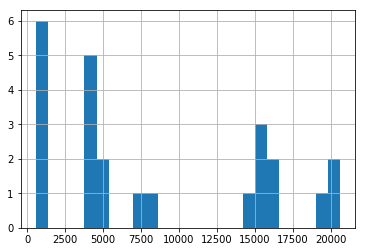

In [7]:
#check population histogram
df['Population'].hist(bins=25)

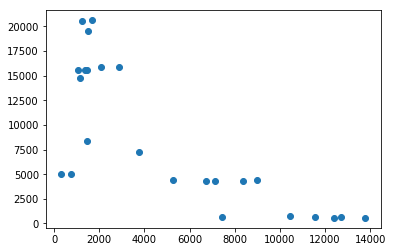

In [8]:
#check relationship between GDP and Population
import matplotlib.pyplot as plt
plt.scatter(df['GDP'], df['Population'])
plt.show() 

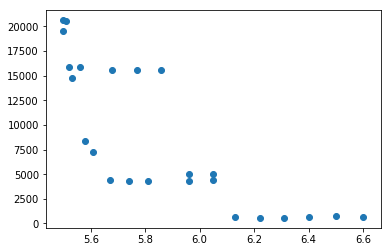

In [9]:
#check relationship between Density and Population
plt.scatter(df['Density'], df['Population'])
plt.show() 

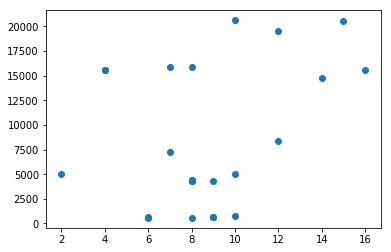

In [10]:
#check relationship between No of country and Population
plt.scatter(df['No of country'], df['Population'])
plt.show() 

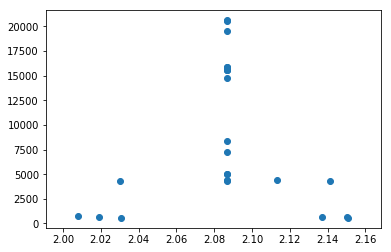

In [11]:
#check relationship between GPI and Population
plt.scatter(df['GPI'], df['Population'])
plt.show() 

In [12]:
#check GDP and Population linear relationship
feature_cols = ['GDP']
X = df[feature_cols]
y = df.Population
lm = LinearRegression()
lm.fit(X, y)

# print the coefficients
print("Intercept: ",lm.intercept_)
print("Coefficient: ",lm.coef_)

#check R squared value
print("R squared value: ",lm.score(X, y))

Intercept:  15075.4912167
Coefficient:  [-1.25033341]
R squared value:  0.608526530207


In [13]:
#check Density and Population linear relationship
feature_cols = ['Density']
X = df[feature_cols]
y = df.Population
lm = LinearRegression()
lm.fit(X, y)

# print the coefficients
print("Intercept: ",lm.intercept_)
print("Coefficient: ",lm.coef_)

#check R squared value
print("R squared value: ",lm.score(X, y))

Intercept:  108000.934889
Coefficient:  [-16926.16251131]
R squared value:  0.640349666758


In [14]:
#check No of Country and Population linear relationship
feature_cols = ['No of country']
X = df[feature_cols]
y = df.Population
lm = LinearRegression()
lm.fit(X, y)

# print the coefficients
print("Intercept: ",lm.intercept_)
print("Coefficient: ",lm.coef_)

#check R squared value
print("R squared value: ",lm.score(X, y))

Intercept:  2050.07677543
Coefficient:  [ 742.34836852]
R squared value:  0.120148204585


In [15]:
# include all variables to build a model
X = df[['GDP', 'Density', 'No of country','GPI']]
y = df.Population

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size = 0.33, random_state=42)

# Instantiate model
lm2 = LinearRegression()

# Fit Model
lm2.fit(X_train, y_train)

# Predict
y_pred = lm2.predict(X_test)

# RMSE-Root Mean Squared Error
print("RMSE Score: ",np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

#MAE is the mean of the absolute value of the errors:
print("MAE Score: ",metrics.mean_absolute_error(y_test, y_pred))

#MSE is the mean of the squared errors:
print("MSE Score: ",metrics.mean_squared_error(y_test, y_pred))

#check R squared value
print("R squared value: ",lm2.score(X,y))

RMSE Score:  5775.39788862
MAE Score:  5191.17342921
MSE Score:  33355220.7719
R squared value:  0.667082571833


In [16]:
# include all variables to build a model
X = df[['GDP', 'Density', 'No of country']]
y = df.Population

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size = 0.33, random_state=42)

# Instantiate model
lm2 = LinearRegression()

# Fit Model
lm2.fit(X_train, y_train)

# Predict
y_pred = lm2.predict(X_test)

# RMSE-Root Mean Squared Error
print("RMSE Score: ",np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

#MAE is the mean of the absolute value of the errors:
print("MAE Score: ",metrics.mean_absolute_error(y_test, y_pred))

#MSE is the mean of the squared errors:
print("MSE Score: ",metrics.mean_squared_error(y_test, y_pred))

#check R squared value
print("R squared value: ",lm2.score(X,y))

RMSE Score:  5534.33290954
MAE Score:  4858.81469735
MSE Score:  30628840.7536
R squared value:  0.680483057498


In [17]:
# include all variables to build a model
X = df[[ 'Density', 'No of country']]
y = df.Population

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size = 0.33, random_state=42)

# Instantiate model
lm2 = LinearRegression()

# Fit Model
lm2.fit(X_train, y_train)

# Predict
y_pred = lm2.predict(X_test)

# RMSE-Root Mean Squared Error
print("RMSE Score: ",np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

#MAE is the mean of the absolute value of the errors:
print("MAE Score: ",metrics.mean_absolute_error(y_test, y_pred))

#MSE is the mean of the squared errors:
print("MSE Score: ",metrics.mean_squared_error(y_test, y_pred))

#check R squared value
print("R squared value: ",lm2.score(X,y))

RMSE Score:  4374.70123865
MAE Score:  3833.34994444
MSE Score:  19138010.9275
R squared value:  0.64253080481


In [18]:
# include all variables to build a model
X = df[[ 'GDP','Density']]
y = df.Population

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size = 0.33, random_state=42)

# Instantiate model
lm2 = LinearRegression()

# Fit Model
lm2.fit(X_train, y_train)

# Predict
y_pred = lm2.predict(X_test)

# RMSE-Root Mean Squared Error
print("RMSE Score: ",np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

#MAE is the mean of the absolute value of the errors:
print("MAE Score: ",metrics.mean_absolute_error(y_test, y_pred))

#MSE is the mean of the squared errors:
print("MSE Score: ",metrics.mean_squared_error(y_test, y_pred))

#check R squared value
print("R squared value: ",lm2.score(X,y))

RMSE Score:  5663.7725041
MAE Score:  4966.17212778
MSE Score:  32078318.9782
R squared value:  0.669795834322


In [19]:
#predict the GDP for future using a linear model with Year
from sklearn import linear_model
X = df[['Year']]
y = df[['GDP']]

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size = 0.33, random_state=42)

# Instantiate model
lm2 = LinearRegression()

# Fit Model
lm2.fit(X_train, y_train)

#R squared value
print("R squared value: ",lm2.score(X,y))

# Predict
pred_Den = [0,0,0,0,0,0]
for i in range (0,6):
    pred_Den[i] = lm2.predict(2017+i)

for i in range(0,6):
    print("Predicted GDP for year: ",(2017+i),pred_Den[i])
lm2.predict(2016)      

R squared value:  0.813462607085
Predicted GDP for year:  2017 [[ 12623.14325495]]
Predicted GDP for year:  2018 [[ 13208.00897277]]
Predicted GDP for year:  2019 [[ 13792.87469059]]
Predicted GDP for year:  2020 [[ 14377.74040842]]
Predicted GDP for year:  2021 [[ 14962.60612624]]
Predicted GDP for year:  2022 [[ 15547.47184406]]


array([[ 12038.27753713]])

In [20]:
#predict the Density for future using a linear model with Year
from sklearn import linear_model
X = df[['Year']]
y = df[['Density']]

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size = 0.33, random_state=42)

# Instantiate model
lm2 = LinearRegression()

# Fit Model
lm2.fit(X_train, y_train)

#R squared value
print("R squared value: ",lm2.score(X,y))

# Predict
pred_Den = [0,0,0,0,0,0]
for i in range (0,6):
    pred_Den[i] = lm2.predict(2017+i)

for i in range(0,6):
    print("Predicted Density for year: ",(2017+i),pred_Den[i])
lm2.predict(2016)      

R squared value:  0.374336782888
Predicted Density for year:  2017 [[ 6.40538057]]
Predicted Density for year:  2018 [[ 6.44775062]]
Predicted Density for year:  2019 [[ 6.49012067]]
Predicted Density for year:  2020 [[ 6.53249072]]
Predicted Density for year:  2021 [[ 6.57486077]]
Predicted Density for year:  2022 [[ 6.61723082]]


array([[ 6.36301052]])

In [21]:
# Forecasted Population of Kazakhstan
X = df[['GDP','Density']]
y = df.Population

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size = 0.33, random_state=42)

# Instantiate model
lm2 = LinearRegression()

# Fit Model
lm2.fit(X_train, y_train)

# Predict
y_pred = lm2.predict(X_test)

    
var_2017 = [[12623.14325495,6.40538057]]
var_2018 = [[13208.00897277,6.44775062]]
var_2019 = [[13792.87469059,6.49012067]]                               
var_2020 = [[14377.74040842,6.53249072]]
var_2021 = [[14962.60612624,6.57486077]]
var_2022 = [[15547.47184406,6.61723082]]

print("Predicted Population for year 2017: ",lm2.predict(var_2017))
print("Predicted Population for year 2018: ",lm2.predict(var_2018))
print("Predicted Population for year 2019: ",lm2.predict(var_2019))
print("Predicted Population for year 2020: ",lm2.predict(var_2020))
print("Predicted Population for year 2021: ",lm2.predict(var_2021))
print("Predicted Population for year 2022: ",lm2.predict(var_2022))



Predicted Population for year 2017:  [-1092.11089406]
Predicted Population for year 2018:  [-1892.03358216]
Predicted Population for year 2019:  [-2691.95627027]
Predicted Population for year 2020:  [-3491.87895838]
Predicted Population for year 2021:  [-4291.80164648]
Predicted Population for year 2022:  [-5091.72433458]


In [22]:
lm2.predict([[12038.27753713,6.36301052]])

array([-292.18820596])